## Web Coverage Service : Example using Python Client : OWSLib 

In [10]:
# Import WCS from owslib
from owslib.wcs import WebCoverageService
import matplotlib.pyplot as plt
from osgeo import gdal

### ECCC's GeoMet webservices: 
* With WCS we want to access the data not just a map

In [11]:
wcs_url = 'http://geo.weather.gc.ca/geomet/?lang=en&service=WCS'
# connection
wcs = WebCoverageService(wcs_url,version='1.0.0')
print(wcs.identification.title)

Meteorological Service of Canada Geospatial Web Services 2.0.6


#### 1 - Let's access the 'High Resolution Deterministic Prediction System (HRDPS)' temperature data : 

* variable code 'HRDPS.CONTINENTAL_TT'

* How would I find this (or any other) variable code? use GetCapabilities request

e.g. http://geo.weather.gc.ca/geomet/?lang=en&service=WCS&request=GetCapabilities

In [12]:
# connect to layer metadata
temp = wcs['HRDPS.CONTINENTAL_TT']

#### 2 - Print some metadata about the wcs layer

In [17]:
#Title
print('Layer title :', temp.title)
#bounding box
print('BoundingBox :', temp.boundingBoxWGS84)
# supported data formats - we'll use geotiff
print('Formats :', temp.supportedFormats)
#grid dimensions
print('Grid upper limits :', temp.grid.highlimits)

Layer title : HRDPS.CONTINENTAL - Air temperature
BoundingBox : (207.037692108399, 27.6163200590158, 316.183159429048, 69.9580565063745)
Formats : ['GEOTIFF_16', 'AAIGRID']
Grid upper limits : ['2575', '1455']


#### 3 - Create WCS inputs

In [18]:
layerid = 'HRDPS.CONTINENTAL_TT'
format_wcs = 'GEOTIFF_16'
bbox_wcs = temp.boundingboxes[0]['bbox'] # Get the entire domain
crs_wcs = temp.boundingboxes[0]['nativeSrs'] # Coordinate system
w = 2575 
h = 1455 

#### 4 - Request and download the data via WCS

In [24]:
output=wcs.getCoverage(identifier=layerid,crs=crs_wcs,bbox=bbox_wcs,
                       width=w,height=h,format=format_wcs)
out_tiff = './output/HRDPS_CONTINENTAL_TT.tiff'
f=open(out_tiff,'wb')
f.write(output.read())
f.close()


#### 5 - Load and display the data

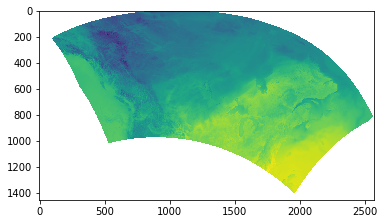

In [26]:
ds = gdal.Open(out_tiff).ReadAsArray()
ds[ds==0]='nan'
#print(ds)
plt.imshow(ds) #Not working - inline option unavailable?